## Homework 5
### Theory Part

**[Q1]** Consider the following 3 × 3 filter.

$$ w = \begin{bmatrix}
        -3 & 0 & 3 \\
        -4 & 0 & 4 \\
        -3 & 0 & 3 
       \end{bmatrix} $$
       
This filter w is applied to a grayscale image shown in Figure 1. 

![figure1](Capture.JPG)

Assume that the dimension the image in Figure 1 is way larger than 3 × 3. We can express the image in terms of matrix M, each element is numbered between 0 to 1 (0 being completely black and 1 being completely white). We are applying convolution of the filter w to $M : (M ∗ w)$. Answer the following questions,

---

**1) For which part of the image will the filter return a number thats furthest possible from
zero (very positive or very negative)? (ignore the arrow and the words, thats for the next
question) Give a max of 3 sentences explanation.**

ANSWER: Furthest possible from zero means that the left side (which will have negative weight) will be closest to 0, while the right side (with positive weight) will be the closest to 1, or the other way around. In this case, the left side and right side of the circle is the furthest from zero, left side having negative number and right side having positive.

**2) Will the convolution output at the location indicated in Figure 1 be positive, negative, or
zero in value? Give a max of 3 sentences explanation.**

ANSWER: It will be zero in value. The location pointed have the same color from left to right, hence the left column will cancel the right column, resulting in 0 output.

---

**[Q2]** Figure 2 illustrates the before and after effect of a blurring filter when applied on a greyscale
image. 

![figure2](Capture2.JPG)


Blurring is an operation that makes strong edges weaker by some kind of averaging. Black
pixels take a value of 0 and white pixes take a value of 1. Assume that the blurring effect is done
using the following 5 by 5 filters with stride 1, and there’s enough zero padding on the image
before processing so that the filter will fit on the edges.
Determine whether each of the filters below can or cannot give a blurring effect and give your
reason in not more than 2 sentences :



1) $ \frac{1}{10} \begin{bmatrix}
                    0 & 0 & 0 & 0 & 0\\
                    0 & 0 & 1 & 0 & 0 \\
                    0 & 1 & -4 & 1 & 0 \\
                    0 & 0 & 1 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0
                   \end{bmatrix}$ ANSWER: will not give blurring effect, as it takes the difference between a pixel and for neighbouring pixels (not averaging).
                   
2) $ \frac{1}{4} \begin{bmatrix}
                    0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                    0 & 0 & 1 & 1 & 0 \\
                    0 & 0 & 1 & 1 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                 \end{bmatrix}$ ANSWER: will give blurring effect, as it averages the pixel with the pixel on the right and below it.
                 
3) $ \begin{bmatrix}
                    0 & 5 & 0 & 5 & 0 \\
                    0 & 2 & 0 & 2 & 0 \\
                    0 & 0 & 0 & 0 & 0 \\
                    0 & -2 & 0 & -2 & 0 \\
                    0 & -5 & 0 & -5 & 0 \\
                 \end{bmatrix}$ ANSWER: will not give blurring effect; positive weight on top and negative weight below detects edges.
                 
4) $ \frac{1}{150} \begin{bmatrix}
                    3 & 4 & 8 & 4 & 3 \\
                    4 & 7 & 9 & 7 & 4 \\
                    8 & 9 & 10 & 9 & 8 \\
                    4 & 7 & 9 & 7 & 4 \\
                    3 & 4 & 8 & 4 & 3 \\
                 \end{bmatrix}$ ANSWER: will give blurring effect; it takes all neighbouring pixel in some proportion. Looks like gaussian blurring.


**[Q3]** Does the following neural networks suffer strongly from the vanishing gradient problem?
Give your reason in not more than 2 sentences.

1. **1-Layer Feed-Foward NN**: _very few layers & backprop; **does not suffer from vanishing gradient**._
2. **Very Deep Feed-Forward NN**: _lots of layers, backprop depends very much on the next layer's gradient; **suffers greatly from vanishing gradient.**_
3. **Recurrent NN**: _lots of gradient terms due to many time steps; **suffers greatly from vanishing gradient**._
4. **LSTM NN**:_**does not suffer from vanishing gradient**_
5. **ResNet**:_has shortcuts for some nodes to skip a few layer, hence **does not suffer from vanishing gradient**._


### Coding Part

Image being used (gudboi):


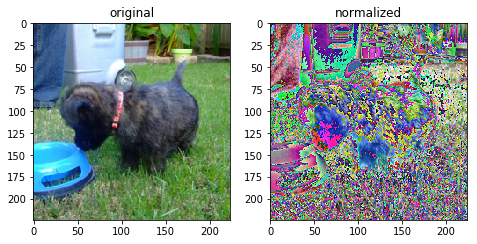

In [1]:
from hw5_code import *
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger

gudboi = Image.open('gudboi.jpg')
gudboi_norm = model_transform(gudboi)

# showing images
plt.figure()
gudboi_nimg = transforms.ToPILImage()(gudboi_norm)
gudboi_back = inv_transform(gudboi_norm)

plt.subplot(131)
plt.imshow(gudboi_back)
plt.title('original')

plt.subplot(132)
plt.imshow(gudboi_nimg)
plt.title('normalized')

print('Image being used (gudboi):')

In [2]:
'''
Using Resnet
'''
gudboi_t = gudboi_norm.view(1, 3, 224, 224).try_cuda()

resnet = get_trained_resnet()
resnet.eval()

# get initial class
output = resnet(gudboi_t)
_, pred = output.max(dim=1)
print('predicted class:', pred.item(), get_descript(pred.item()))

predicted class: 233 Bouvier des Flandres, Bouviers des Flandres


In [3]:
# randomize target class, just because 
# (or set to 414 backpack, 293 cheetah)
target_class = np.random.randint(1000) 
print('Target class:', target_class, get_descript(target_class))

Target class: 873 triumphal arch


In [4]:
'''
Improved Net Deceiver
'''
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

inv_normal = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                        std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                        std = [ 1., 1., 1. ]),
                                ])



def fool_model(model, image, target_class, maxiter=1000, fool_rate=0.1, improved=False):
    image_tensor = image.clone().view(1, 3, 224, 224).try_cuda()
    image_var = Variable(image_tensor, requires_grad=True)
    
    optimizer = optim.SGD([image_var], lr=fool_rate)
    criterion = nn.CrossEntropyLoss()
    
    for i in range(maxiter):
        # forward pass
        resnet.eval()
        output = resnet(image_var)
        _, pred = output.max(dim=1)

        if i % 1 == 0:
            print(i,'   current prediction:', pred.item(), get_descript(pred.item()))

        if pred == target_class:
            print('Ha! Fooled')
            break

        # ascending gradient
        resnet.zero_grad()
        class_loss = -output[0, target_class]
        class_loss.backward() # calling backward fill the .grad with the supposed gradient
        
        # mess with .grad for algo improvement
        if improved:
            # get temp x
            image_var_temp = image_var.clone()
            image_var_temp -= image_var.grad
            
            # check for border condition
            ivt = inv_normal(image_var_temp.view(3, 224, 224).cpu().detach())
            ivt_lower = (ivt >= 2/256)
            ivt_upper = (ivt <= 253/256)
            ivt_mask = np.logical_and(ivt_lower, ivt_upper).float().try_cuda()
            
            # change gradients to 0 for bad pixel
            before_grad = image_var.grad.clone()
            image_var.grad *= ivt_mask
            
            print('            [blocked grad', (1-ivt_mask).sum().item(), 
                  '] [sum changed', (before_grad - image_var.grad).sum().item(), ']')
        
        optimizer.step() # calling .step() updates the variables with its current .grad
        
        
    return image_var


In [5]:
# iterate until pred = target
gudboi_norm = model_transform(gudboi)
gudboi_v = fool_model(resnet, gudboi_norm, target_class)

# get fooled class
output = resnet(gudboi_v)
_, pred = output.max(dim=1)
print('\npredicted class:', pred.item(), get_descript(pred.item()))

0    current prediction: 182 Border terrier
1    current prediction: 192 cairn, cairn terrier
2    current prediction: 192 cairn, cairn terrier
3    current prediction: 192 cairn, cairn terrier
4    current prediction: 192 cairn, cairn terrier
5    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
6    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
7    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
8    current prediction: 873 triumphal arch
Ha! Fooled

predicted class: 873 triumphal arch


Total value difference: 169849 
Average value difference: 1.1283548575680271
Image being used (gudboi):


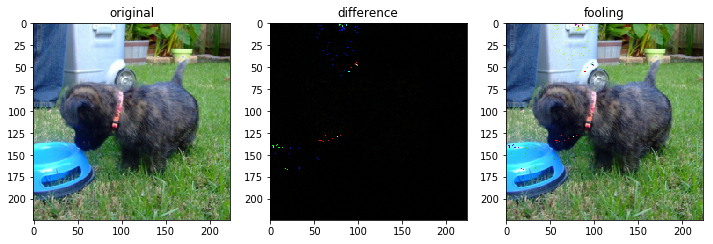

In [6]:
# showing images
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger
plot_with_difference(gudboi_norm, gudboi_v)

print('Image being used (gudboi):')

In [7]:

print('\nWith improved:')
gudboi_norm = model_transform(gudboi)
gudboi_v = fool_model(resnet, gudboi_norm, target_class, improved=True)

# get fooled class
output = resnet(gudboi_v)
_, pred = output.max(dim=1)
print('\npredicted class:', pred.item(), get_descript(pred.item()))


With improved:
0    current prediction: 182 Border terrier
            [blocked grad 4172.0 ] [sum changed -3.676758289337158 ]
1    current prediction: 192 cairn, cairn terrier
            [blocked grad 4220.0 ] [sum changed 0.07354394346475601 ]
2    current prediction: 192 cairn, cairn terrier
            [blocked grad 4185.0 ] [sum changed 3.3777565956115723 ]
3    current prediction: 192 cairn, cairn terrier
            [blocked grad 4101.0 ] [sum changed 0.5916495323181152 ]
4    current prediction: 192 cairn, cairn terrier
            [blocked grad 4028.0 ] [sum changed -2.0477681159973145 ]
5    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
            [blocked grad 3969.0 ] [sum changed -1.7464954853057861 ]
6    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
            [blocked grad 3875.0 ] [sum changed 1.062559723854065 ]
7    current prediction: 233 Bouvier des Flandres, Bouviers des Flandres
            [blocked grad 3862.0 ] [

Total value difference: 139403 
Average value difference: 0.9260934842687075
Image being used (gudboi):


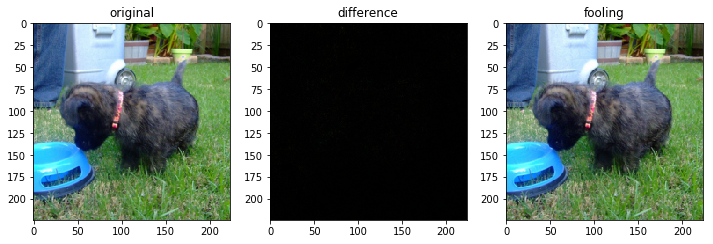

In [8]:
# showing images
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger
plot_with_difference(gudboi_norm, gudboi_v)

print('Image being used (gudboi):')

In [9]:
mrshout = Image.open('mrshout.jpg')
mrshout_norm = model_transform(mrshout)
mrshout_t = mrshout_norm.view(1, 3, 224, 224).try_cuda()

# get initial class
output = resnet(mrshout_t)
_, pred = output.max(dim=1)
print('predicted class:', pred.item(), get_descript(pred.item()))

predicted class: 850 teddy, teddy bear


In [10]:
target_class = 949 # strawberry

newshout_v = fool_model(resnet, mrshout_norm, target_class, improved=True)

# get fooled class
output = resnet(newshout_v)
_, pred = output.max(dim=1)
print('\npredicted class:', pred.item(), get_descript(pred.item()))

0    current prediction: 850 teddy, teddy bear
            [blocked grad 6074.0 ] [sum changed -0.6762844324111938 ]
1    current prediction: 850 teddy, teddy bear
            [blocked grad 6070.0 ] [sum changed -1.0522181987762451 ]
2    current prediction: 850 teddy, teddy bear
            [blocked grad 6072.0 ] [sum changed -0.8134231567382812 ]
3    current prediction: 850 teddy, teddy bear
            [blocked grad 6063.0 ] [sum changed -1.4373506307601929 ]
4    current prediction: 850 teddy, teddy bear
            [blocked grad 6055.0 ] [sum changed -1.8967173099517822 ]
5    current prediction: 850 teddy, teddy bear
            [blocked grad 6053.0 ] [sum changed -1.8802016973495483 ]
6    current prediction: 850 teddy, teddy bear
            [blocked grad 6055.0 ] [sum changed -1.1519039869308472 ]
7    current prediction: 850 teddy, teddy bear
            [blocked grad 6053.0 ] [sum changed 0.020543351769447327 ]
8    current prediction: 949 strawberry
Ha! Fooled

predicted c

Total value difference: 139743 
Average value difference: 0.928352200255102
Image being used (mrshout):


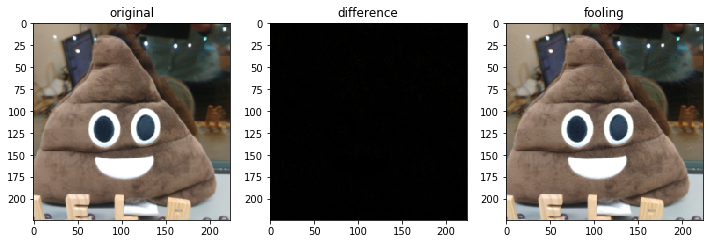

In [11]:
plt.rcParams['figure.figsize'] = [12, 10] # make figures bigger
plot_with_difference(mrshout_norm, newshout_v)

print('Image being used (mrshout):')

In [12]:
newshout_image = inv_transform(newshout_v.clone().view(3,224,224).cpu().detach())
newshout_image.save("mrshout_strawberry.png")

In [13]:
totally_not_shout = Image.open('mrshout_strawberry.png')
not_shout_norm = model_transform(totally_not_shout).view(1, 3, 224, 224).try_cuda()

output = resnet(not_shout_norm)
_, pred = output.max(dim=1)
print('\npredicted class:', pred.item(), get_descript(pred.item()))


predicted class: 949 strawberry


### Coding Part 2

In [14]:
from hw5_rnn import *

dataset = InternationalNameDataset('../datasets/simplelanguage/data/names/')
train_data, test_data = dataset.split_train_test()

In [15]:
n_hidden = 32
no_layer = 1
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')



With 32 hidden layer dimension and 1 LSTM stack:
training
      >> Epoch loss 1.25388 accuracy 0.621                      in 93.3071s
On testing data
      >> Epoch loss 1.10305 accuracy 0.670                      in 26.7760s


In [16]:
n_hidden = 64
no_layer = 1
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')


With 64 hidden layer dimension and 1 LSTM stack:
training
      >> Epoch loss 1.23827 accuracy 0.623                      in 95.4663s
On testing data
      >> Epoch loss 1.05371 accuracy 0.685                      in 27.3032s


In [17]:
n_hidden = 128
no_layer = 1
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')


With 128 hidden layer dimension and 1 LSTM stack:
training
      >> Epoch loss 1.23914 accuracy 0.621                      in 93.8702s
On testing data
      >> Epoch loss 1.04816 accuracy 0.684                      in 25.6871s


In [18]:
n_hidden = 32
no_layer = 2
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')


With 32 hidden layer dimension and 2 LSTM stack:
training
      >> Epoch loss 1.44265 accuracy 0.575                      in 138.2903s
On testing data
      >> Epoch loss 1.18683 accuracy 0.661                      in 30.1122s


In [19]:
n_hidden = 64
no_layer = 2
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')


With 64 hidden layer dimension and 2 LSTM stack:
training
      >> Epoch loss 1.38928 accuracy 0.589                      in 141.1537s
On testing data
      >> Epoch loss 1.11975 accuracy 0.667                      in 37.0601s


In [20]:
n_hidden = 128
no_layer = 2
print("\nWith {} hidden layer dimension and {} LSTM stack:".format(n_hidden, no_layer))
lstm_mod = CoveredLSTM(len(charspace), n_hidden, no_layer, len(dataset.categories)).cuda()
print("training")
trained_model = train(train_data, lstm_mod, lr=5e-2, mode='train')
print("On testing data")
final_model = train(test_data, lstm_mod, lr=5e-2, mode='test')


With 128 hidden layer dimension and 2 LSTM stack:
training
      >> Epoch loss 1.37935 accuracy 0.588                      in 137.6939s
On testing data
      >> Epoch loss 1.16083 accuracy 0.660                      in 31.6138s
